In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζουμε τα dataframes που φτιάξαμε στα 2 analysis notebooks

In [ ]:
import pandas as pd

df_newsbeast = pd.read_csv('/content/drive/MyDrive/short_newsbeast.csv')
df_efsyn = pd.read_csv('/content/drive/MyDrive/short_efsyn.csv')

Εξάγουμε τη στήλη 'text' από το καθένα

In [ ]:
newsbeast_text = df_newsbeast['text'].str.cat(sep = ' ')


In [ ]:
efsyn_text = df_efsyn['text'].str.cat(sep = ' ')


In [ ]:
two_sites_list = [] # make a list to put in the dictionaries that are created below
newsbeastD = {'site' : 'newsbeast.gr', 'text' : newsbeast_text} # make a dictionary for efsyn
two_sites_list.append(newsbeastD) # add the dictionary to the list
efsynD = {'site' : 'efsyn.gr', 'text' : efsyn_text} # create a dictionary for skai
two_sites_list.append(efsynD) # add the dictionary to the list
two_sites_df = pd.DataFrame(two_sites_list) # create a dataframe from the list with the two dictionaries

In [ ]:
# !python -m spacy download el_core_news_sm

2023-07-12 18:16:31.680095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 18:16:32.770925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 27.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity

nlp=spacy.load('el_core_news_sm')

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)


Παρουσιάζω το βαθμό ομοιότητας ανάμεσα στα άρθρα των 2 sites

([<matplotlib.axis.YTick at 0x790c1e6fc2b0>,
 [Text(0, 0, 'newsbeast.gr'), Text(0, 1, 'efsyn.gr')])

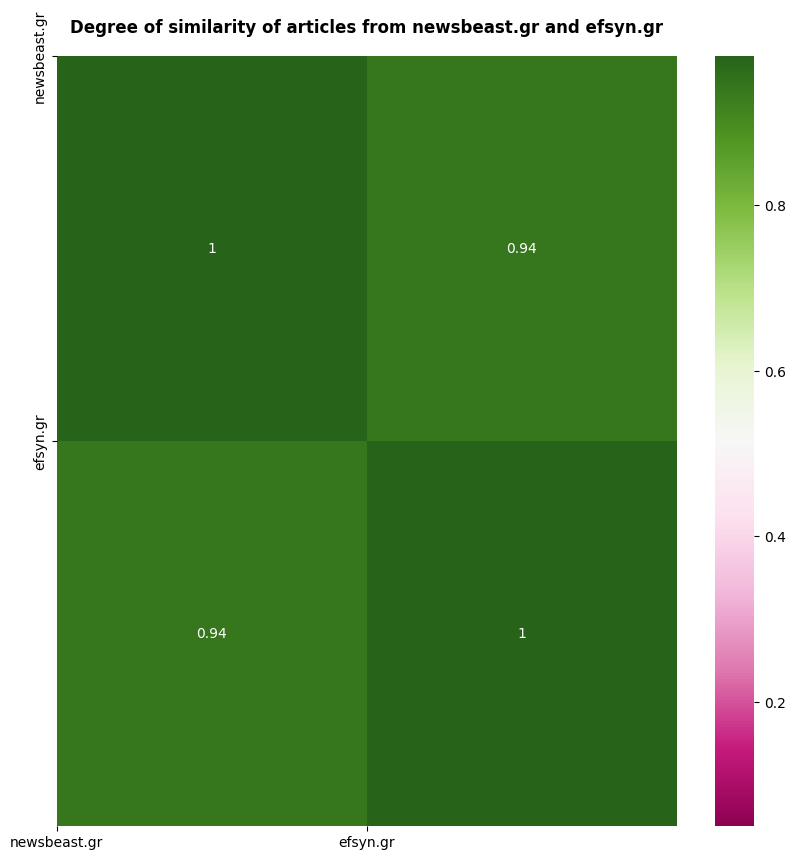

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.title('Degree of similarity of articles from newsbeast.gr and efsyn.gr', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['newsbeast.gr', 'efsyn.gr'])
plt.yticks([0, 1], ['newsbeast.gr', 'efsyn.gr'])